# GAN Generator

This notebook briefly describes Generative Additive Network and explores the use of the SDV library to generate synthetic data for an enriched telco dataset and the Enriched data set. It evaluates the models used using SDV model metrics which evaluate how similar the evaluated data is. 

These model take quite long to fit, specifically, the CTGAN model took 10-15 min to fit the 10000 entries of the telco dataset. All the models originally took longer, however, tuning hyper parameters has increased speed and accuracy with the Gaussian Copula model having the best results throughout experimentation after field transformers were applied.

# Takeaways Summary
These models work very well when it comes to data generation. Though some can be slow, using field transformers can speed them up and once the model is trained, generation is almost instant. 

Field transformers seem to be the most important feature of these models, however, as will be observed in the synthetic generation notebook, other constraints also exist which make customisation for specific datasets simple and easy to use. 

**_Steps to implement on any data set:_** 
* **Import** the models and **load** the dataset
* Understand and establish the fields of the dataset and **set field transformer and constraints** if neccessary
* **Initialize** model with constraints
* **Train/fit** model on real data
* **Sample/Generate** new data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Takeaways-Summary" data-toc-modified-id="Takeaways-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Takeaways Summary</a></span></li><li><span><a href="#GAN-Defenitions--" data-toc-modified-id="GAN-Defenitions---3"><span class="toc-item-num">3&nbsp;&nbsp;</span>GAN Defenitions  <a class="anchor" id="GANexp"></a></a></span><ul class="toc-item"><li><span><a href="#Generative-Adversarial-Networks-" data-toc-modified-id="Generative-Adversarial-Networks--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generative Adversarial Networks <a class="anchor" id="GANdef"></a></a></span></li><li><span><a href="#Models-in-Synthetic-Data-Vault-(SDV)-library-" data-toc-modified-id="Models-in-Synthetic-Data-Vault-(SDV)-library--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Models in Synthetic Data Vault (SDV) library <a class="anchor" id="sdv"></a></a></span><ul class="toc-item"><li><span><a href="#Gaussian-Copula-Model:-" data-toc-modified-id="Gaussian-Copula-Model:--3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Gaussian Copula Model: <a class="anchor" id="Gaussian_def"></a></a></span></li><li><span><a href="#Condition-Tabular-GAN-(CTGAN)-Model:-" data-toc-modified-id="Condition-Tabular-GAN-(CTGAN)-Model:--3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Condition Tabular GAN (CTGAN) Model: <a class="anchor" id="CTGAN_def"></a></a></span></li><li><span><a href="#CopulaGAN-Model:-" data-toc-modified-id="CopulaGAN-Model:--3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>CopulaGAN Model: <a class="anchor" id="Copula_Def"></a></a></span></li><li><span><a href="#Tabular-Variational-AutoEncoder-(TVAE)-Model-:" data-toc-modified-id="Tabular-Variational-AutoEncoder-(TVAE)-Model-:-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Tabular Variational AutoEncoder (TVAE) Model <a class="anchor" id="TVAE_def"></a>:</a></span></li></ul></li><li><span><a href="#Prerequisites-" data-toc-modified-id="Prerequisites--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Prerequisites <a class="anchor" id="Prerequisites"></a></a></span></li></ul></li><li><span><a href="#Experimentation-on-enriched-Telco-" data-toc-modified-id="Experimentation-on-enriched-Telco--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Experimentation on enriched Telco <a class="anchor" id="Experimentation_telco"></a></a></span><ul class="toc-item"><li><span><a href="#Loading-and-enriching-data-set-" data-toc-modified-id="Loading-and-enriching-data-set--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading and enriching data set <a class="anchor" id="loading"></a></a></span></li><li><span><a href="#Fitting-the-models-" data-toc-modified-id="Fitting-the-models--4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fitting the models <a class="anchor" id="fitting"></a></a></span><ul class="toc-item"><li><span><a href="#GaussianCopula-" data-toc-modified-id="GaussianCopula--4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>GaussianCopula <a class="anchor" id="gaussian_fit"></a></a></span></li><li><span><a href="#CTGAN-" data-toc-modified-id="CTGAN--4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>CTGAN <a class="anchor" id="CTGAN_fit"></a></a></span></li><li><span><a href="#CopulaGAN-" data-toc-modified-id="CopulaGAN--4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>CopulaGAN <a class="anchor" id="copula_fit"></a></a></span></li><li><span><a href="#TVAE--" data-toc-modified-id="TVAE---4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>TVAE  <a class="anchor" id="TVAE_fit"></a></a></span></li></ul></li><li><span><a href="#Evaluation-of-synthetic-data-" data-toc-modified-id="Evaluation-of-synthetic-data--4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Evaluation of synthetic data <a class="anchor" id="eval"></a></a></span><ul class="toc-item"><li><span><a href="#Metric-types-" data-toc-modified-id="Metric-types--4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Metric types <a class="anchor" id="metrics"></a></a></span><ul class="toc-item"><li><span><a href="#Statistical-metrics-" data-toc-modified-id="Statistical-metrics--4.3.1.1"><span class="toc-item-num">4.3.1.1&nbsp;&nbsp;</span>Statistical metrics <a class="anchor" id="stat"></a></a></span></li><li><span><a href="#Likelihood-Metrics-" data-toc-modified-id="Likelihood-Metrics--4.3.1.2"><span class="toc-item-num">4.3.1.2&nbsp;&nbsp;</span>Likelihood Metrics <a class="anchor" id="likelihood"></a></a></span></li><li><span><a href="#Detection-Metrics-" data-toc-modified-id="Detection-Metrics--4.3.1.3"><span class="toc-item-num">4.3.1.3&nbsp;&nbsp;</span>Detection Metrics <a class="anchor" id="detection"></a></a></span></li></ul></li><li><span><a href="#Gaussian-Copula--" data-toc-modified-id="Gaussian-Copula---4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Gaussian Copula  <a class="anchor" id="gaussian_eval"></a></a></span></li><li><span><a href="#CTGAN-" data-toc-modified-id="CTGAN--4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>CTGAN <a class="anchor" id="CTGAN_eval"></a></a></span></li><li><span><a href="#CopulaGAN" data-toc-modified-id="CopulaGAN-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>CopulaGAN<a class="anchor" id="copula_eval"></a></a></span></li><li><span><a href="#TVAE-" data-toc-modified-id="TVAE--4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>TVAE <a class="anchor" id="TVAE_eval"></a></a></span></li></ul></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li><li><span><a href="#Experimentation-on-enriched-dataset-" data-toc-modified-id="Experimentation-on-enriched-dataset--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Experimentation on enriched dataset <a class="anchor" id="Experimentation"></a></a></span><ul class="toc-item"><li><span><a href="#Loading-enriched-dataset-" data-toc-modified-id="Loading-enriched-dataset--5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Loading enriched dataset <a class="anchor" id="loading2"></a></a></span></li><li><span><a href="#Fitting-the-models-" data-toc-modified-id="Fitting-the-models--5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting the models <a class="anchor" id="fitting2"></a></a></span><ul class="toc-item"><li><span><a href="#GaussianCopula-" data-toc-modified-id="GaussianCopula--5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>GaussianCopula <a class="anchor" id="gaussian_fit2"></a></a></span></li><li><span><a href="#CTGAN-" data-toc-modified-id="CTGAN--5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>CTGAN <a class="anchor" id="CTGAN_fit2"></a></a></span></li><li><span><a href="#CopulaGAN-" data-toc-modified-id="CopulaGAN--5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>CopulaGAN <a class="anchor" id="copula_fit2"></a></a></span></li><li><span><a href="#TVAE--" data-toc-modified-id="TVAE---5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>TVAE  <a class="anchor" id="TVAE_fit2"></a></a></span></li></ul></li><li><span><a href="#Evaluation-of-synthetic-data-" data-toc-modified-id="Evaluation-of-synthetic-data--5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Evaluation of synthetic data <a class="anchor" id="eval2"></a></a></span><ul class="toc-item"><li><span><a href="#Gaussian-Copula--" data-toc-modified-id="Gaussian-Copula---5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Gaussian Copula  <a class="anchor" id="gaussian_eval2"></a></a></span></li><li><span><a href="#CTGAN-" data-toc-modified-id="CTGAN--5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>CTGAN <a class="anchor" id="CTGAN_eval2"></a></a></span></li><li><span><a href="#CopulaGAN-" data-toc-modified-id="CopulaGAN--5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>CopulaGAN <a class="anchor" id="copula_eval2"></a></a></span></li><li><span><a href="#TVAE-" data-toc-modified-id="TVAE--5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>TVAE <a class="anchor" id="TVAE_eval2"></a></a></span></li></ul></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li></ul></div>

# GAN Definitions  <a class="anchor" id="GANexp"></a>

## Generative Adversarial Networks <a class="anchor" id="GANdef"></a>

A generative adversarial network (GAN) is a class of machine learning frameworks where two neural networks contest with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss). This can be applied and extended to generate data in many different fields from fashion to video games. The two neural networks, the generator and discriminator, both get better with each epoch. 

The way it works is the Generator learns to map latent space to a distribution, ie. the real data. Then the Discriminator takes this new mapped data and real data and attemps to distinguish between the two. Both models' goals are increasing the other model's error rate while decreasing their own creating a synergetic development of both networks until the Generator's synthetic data is relatively indistinguishable from the real data.

## Models in Synthetic Data Vault (SDV) library <a class="anchor" id="sdv"></a>





### Gaussian Copula Model: <a class="anchor" id="Gaussian_def"></a>



Intuitively, the Gaussian copula takes d marginal distributions and turns them into a single multivariate distribution $[0,1]^{d}$ using correlation coefficients. It uses this multivariate distribution to generate all values at once.

Mathematically, It is constructed from a multivariate normal distribution over $\mathbb {R} ^{d}$ by using the probability integral transform. For a given correlation matrix ${\displaystyle R\in [-1,1]^{d\times d}}$, the Gaussian copula with parameter matrix ${\displaystyle R}$ can be written as
> $C_{R}^{\text{Gauss}}(u)=\Phi _{R}\left(\Phi ^{-1}(u_{1}),\dots ,\Phi ^{-1}(u_{d})\right)$ 

where $ \Phi ^{-1}$ is the inverse cumulative distribution function of a standard normal and $\Phi _{R}$ is the joint cumulative distribution function of a multivariate normal distribution with mean vector zero and covariance matrix equal to the correlation matrix $R$. 

${\displaystyle C_{R}^{\text{Gauss}}(u)}$ is approximated using numerical integration and the density can be written as:

>${\displaystyle C_{R}^{\text{Gauss}}(u)={\frac {1}{\sqrt {\det {R}}}}\exp \left(-{\frac {1}{2}}{\begin{pmatrix}\Phi ^{-1}(u_{1})\\\vdots \\\Phi ^{-1}(u_{d})\end{pmatrix}}^{T}\cdot \left(R^{-1}-I\right)\cdot {\begin{pmatrix}\Phi ^{-1}(u_{1})\\\vdots \\\Phi ^{-1}(u_{d})\end{pmatrix}}\right),}$
where $\mathbf {I}$  is the identity matrix.


### Condition Tabular GAN (CTGAN) Model: <a class="anchor" id="CTGAN_def"></a>


{Lei Xu et.al,2019}{http://arxiv.org/abs/1907.00503}

CTGAN is a GAN-based method to model tabular data distribution and sample rows from the distribution. It addresses data imbalance in other GAN models caused by the need to simultaneously model discrete and continuous columns, the multi-modal non-Gaussian values within each continuous column, and the severe imbalance of categorical columns by employing a conditional generator and training-by-sampling.

Let $k$  be the value from the $i^{th}$ discrete column $D_{i}$ that has to be matched by the generated samples $r$, then the generator can be interpreted as the conditional distribution of rows given that particular value at that particular column, i.e. $r ∼ PG(row|D_i = k)$.

> $P(row) = \sum_{k \in D_{i}}PG(row|D_{i} = k)P(D_{i} = k)$

The output produced by the conditional generator must be assessed by the
critic, which estimates the distance between the learned conditional distribution $PG(row|cond)$ and
the conditional distribution on real data $P(row|cond)$. The sampling of real training data and the
construction of cond vector comply to help critic estimate the distance. Properly sampled
the cond vector and training data helps the model evenly explore all possible values in discrete
columns. 
 


### CopulaGAN Model: <a class="anchor" id="Copula_Def"></a>



Uses the cummulative distribution function based approach of the Gaussian Capula model with the conditional GAN model to make the underlying CTGAN model task of learning the data easier.



### Tabular Variational AutoEncoder (TVAE) Model <a class="anchor" id="TVAE_def"></a>:


{Lei Xu et.al,2019} {http://arxiv.org/abs/1907.00503 }

It is another neural network generative model and uses two neural networks to model $p_θ(r_j |z_j )$ and $q_φ(z_j |r_j )$, and train them using evidence lower-bound (ELBO) loss. Sdv uses the design present in the paper above.

## Prerequisites <a class="anchor" id="Prerequisites"></a>

In [1]:
# General imports
# Make sure to be in version 3.6-3.8 of python to import sdv, does not work on python 3.9.
import numpy as np
import pandas as pd
import warnings
import yapf

#from utils.Binning import *
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

#Included to increase evaluation accuracy
logistic = LogisticRegression(max_iter=1000)
pipe = Pipeline([('reduce_dim', 'passthrough'),
                 ('classify', LinearSVC(dual=False, max_iter=1000), logistic)])

warnings.filterwarnings('ignore')

# Experimentation on enriched Telco <a class="anchor" id="Experimentation_telco"></a>

## Loading and enriching data set <a class="anchor" id="loading"></a>

Use of raw code from _Scoring - 1 - LogReg and GAM experimenting_ file to ensure understanding of data being generated.

In [2]:
dfRawFile = pd.read_csv('./../data/common/telco_appfrauddetect.csv',
                        sep=',',
                        on_bad_lines='error')
# A column will be removed if it contains more than [threshold] (%) records
threshold = 0.7

# List columns that have more than 80% null values
na_values = dfRawFile.isnull().mean()
print(na_values[na_values > threshold])

# Drop columns with more than 80% null values
dfRawFile.dropna(thresh=dfRawFile.shape[0] * (1 - threshold),
#                 how='all',
                 axis=1,
                 inplace=True)

del threshold, na_values
# Wrangle dataset
dfRawFile.loc[dfRawFile['timeSubmitSec'] < 0, 'timeSubmitSec'] = 0

dfRawFile['label'] = dfRawFile['app_status'].map({'valid': 0, 'invalid': 1})

dfRawFile.loc[dfRawFile['browser'] > 5, 'browser'] = 6
dfRawFile['browserType'] = dfRawFile['browser'].map({
    0: 'edge',
    1: 'chrome',
    2: 'safari',
    3: 'firefox',
    4: 'opera',
    5: 'vivaldi',
    6: 'others'
})
dfRawFile['inCustType'] = dfRawFile['inCust'].map({0: 'N', 1: 'Y'})
dfRawFile['packageType'] = dfRawFile['package'].map({
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    18: 'Q',
    21: 'R',
    24: 'S',
    27: 'T',
    30: 'U'
})
dfRawFile['weekDayType'] = dfRawFile['weekDay'].map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
})
dfRawFile.drop(['app_id', 'app_status', 'score'], axis=1, inplace=True)

dfRawFile.drop(columns=['browser', 'package', 'inCust', 'weekDay'],
               inplace=True)
dfEnriched = dfRawFile.copy()
dfEnriched.to_csv('./../data/common/telco_enricheddata.csv')

# Drop initial dataset
del dfRawFile
dfEnriched.head()

Series([], dtype: float64)


,ipRange,ipHop,timeSubmitSec,inList,appHour,label,browserType,inCustType,packageType,weekDayType
0,12307.0,0.0,20.0,0.0,11.0,0,firefox,Y,A,Sun
1,15384.0,0.0,18.0,0.0,11.0,0,safari,Y,G,Sun
2,9230.0,0.0,18.0,0.0,10.0,0,edge,N,D,Sun
3,6153.0,1.0,20.0,0.0,10.0,0,edge,Y,A,Sun
4,21538.0,1.0,21.0,0.0,11.0,0,chrome,N,J,Thu


## Fitting the models <a class="anchor" id="fitting"></a>

 All features in the data set are object types, field transformers 
     help the models distinguish between the types during fitting, 
     returning data to initial type when sampling

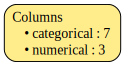

In [3]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(dfEnriched)
metadata.visualize(
    show_table_details='summarized',
    output_filepath='./../data/metadata/telco_appfrauddetect.png'
)

Fitting all the models follows the same steps. Initialising model with constraints and transformers, fitting the model, then sampling (generating) the amount of data needed.

### GaussianCopula <a class="anchor" id="gaussian_fit"></a>

In [4]:
from sdv.single_table import GaussianCopulaSynthesizer

gcop_synthesizer = GaussianCopulaSynthesizer(metadata)
gcop_synthesizer.fit(dfEnriched)
gcop_synthesizer.save(
    filepath='./../models/gcop_telco_appfrauddetect.pkl'
)

In [5]:
gaussianData = gcop_synthesizer.sample(10000)
gaussianData.to_csv('./../data/synthesized/telco_gaussiandata.csv')
gaussianData.head()

,ipRange,ipHop,timeSubmitSec,inList,appHour,label,browserType,inCustType,packageType,weekDayType
0,18231.0,1.0,11.0,1.0,13.0,1,edge,Y,J,Sun
1,19179.0,0.0,14.0,0.0,10.0,0,edge,N,D,Sun
2,4106.0,1.0,15.0,0.0,13.0,0,safari,Y,G,Sat
3,18010.0,0.0,21.0,0.0,7.0,0,safari,Y,D,Thu
4,7349.0,0.0,15.0,0.0,13.0,0,safari,N,D,Fri


### CTGAN <a class="anchor" id="CTGAN_fit"></a>

In [6]:
# doc: https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/ctgansynthesizer
from sdv.single_table import CTGANSynthesizer

ctg_synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=False,
    epochs=500,
    verbose=True)
ctg_synthesizer.fit(dfEnriched)
ctg_synthesizer.save(
    filepath='./../models/ctg_telco_appfrauddetect.pkl'
)

Gen. (-0.87) | Discrim. (-0.02): 100%|██████████| 500/500 [07:23<00:00,  1.13it/s]


In [7]:
ctgData = ctg_synthesizer.sample(num_rows=10000)
ctgData.to_csv('./../data/synthesized/telco_ctgdata.csv')
ctgData.describe()

,ipRange,ipHop,timeSubmitSec,inList,appHour,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13073.310634,0.871400,14.627075,1.221600,12.128832,0.288600
std,5575.047437,1.168332,7.570229,1.496368,5.475191,0.453134
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9315.891624,0.000000,4.709578,0.000000,9.873289,0.000000
50%,14344.982077,0.000000,18.015495,0.000000,10.960503,0.000000
75%,16105.334510,1.000000,20.047814,3.000000,13.548991,1.000000
max,37160.113222,5.000000,25.763472,6.000000,23.000000,1.000000


### CopulaGAN <a class="anchor" id="copula_fit"></a>

In [8]:
#doc: https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/copulagansynthesizer
from sdv.single_table import CopulaGANSynthesizer

cop_synthesizer = CopulaGANSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True)
cop_synthesizer.fit(dfEnriched)
cop_synthesizer.save(
    filepath='./../models/cop_telco_appfrauddetect.pkl'
)

Gen. (-1.03) | Discrim. (-0.15): 100%|██████████| 500/500 [08:05<00:00,  1.03it/s]


In [9]:
copulaData = cop_synthesizer.sample(10000)
copulaData.to_csv('./../data/synthesized/telco_copuladata.csv')
copulaData.describe()

,ipRange,ipHop,timeSubmitSec,inList,appHour,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,12519.011916,0.935000,14.588610,1.225300,14.230829,0.352800
std,4236.437605,1.213723,7.284561,1.414263,5.237470,0.477865
min,23.875029,0.000000,0.380304,0.000000,1.000000,0.000000
25%,9345.141107,0.000000,5.686502,0.000000,10.947251,0.000000
50%,12196.609450,0.000000,18.875631,1.000000,12.008672,0.000000
75%,13710.805341,2.000000,20.069704,3.000000,20.414132,1.000000
max,34338.759752,5.000000,26.419690,6.000000,23.000000,1.000000


### TVAE  <a class="anchor" id="TVAE_fit"></a>

In [10]:
from sdv.single_table import TVAESynthesizer

tvae_synthesizer = TVAESynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500
)
tvae_synthesizer.fit(dfEnriched)
tvae_synthesizer.save(
    filepath='./../models/tvae_telco_appfrauddetect.pkl'
)

In [11]:
tvaeData = tvae_synthesizer.sample(10000)
tvaeData.to_csv('./../data/synthesized/telco_tvaedata.csv')
tvaeData.head()

,ipRange,ipHop,timeSubmitSec,inList,appHour,label,browserType,inCustType,packageType,weekDayType
0,24517.434149,0.0,17.956233,0.0,10.995444,0,edge,Y,G,Fri
1,87.268961,0.0,18.074800,0.0,11.003572,0,chrome,Y,A,Sun
2,21545.637319,0.0,20.032476,1.0,11.996336,0,edge,N,D,Sun
3,20999.785616,1.0,2.901782,3.0,21.740258,1,vivaldi,Y,N,Sun
4,6142.802620,1.0,18.118603,1.0,7.013067,0,edge,Y,A,Sat


## Evaluation of synthetic data <a class="anchor" id="eval"></a>

### Metric types <a class="anchor" id="metrics"></a>
#### Statistical metrics <a class="anchor" id="stat"></a>
These metrics compare individual columns from the real table with the corresponding column from the synthetic table, and at the end report the average outcome from the test.

_CS test_: This metric uses the Chi-Squared test to compare the distributions of two discrete columns. The output for each column is the CSTest p-value, which indicates the probability of the two columns having been sampled from the same distribution.

_KS test_: This metric uses the two-sample Kolmogorov–Smirnov test to compare the distributions of continuous columns using the empirical CDF. The output for each column is 1 minus the KS Test D statistic, which indicates the maximum distance between the expected CDF and the observed CDF values.

#### Likelihood Metrics <a class="anchor" id="likelihood"></a>

The metrics of this family compare the tables by fitting the real data to a probabilistic model and afterwards compute the likelihood of the synthetic data belonging to the learned distribution.


_Bayesian Network likelihood_: This metric fits a BayesianNetwork to the real data and then evaluates the average likelihood of the rows from the synthetic data on it.

_Bayesian Network log likelihood_: This metric fits a BayesianNetwork to the real data and then evaluates the average log likelihood of the rows from the synthetic data on it.

_Gaussian Mixture log likelihood_: This metric fits multiple GaussianMixture models to the real data and then evaluates the average log likelihood of the synthetic data on them.

#### Detection Metrics <a class="anchor" id="detection"></a>
The metrics of this family evaluate how hard it is to distinguish the synthetic data from the real data by using a Machine Learning model. To do this, the metrics will shuffle the real data and synthetic data together with flags indicating whether the data is real or synthetic, and then cross validate a Machine Learning model that tries to predict this flag. The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits. Meaning the closer the value gets to 1, the harder it is for the classifier to seperate the real from the generate data.

_Logistic Detection_: Detection metric based on a LogisticRegression classifier. 

_SVC Detection_: Detection metric based on a SVC classifier.

1 - ROC AUC score so the closer to 1, the less the regressor can classify between the true and generated data.

In [12]:
#doc: https://docs.sdv.dev/sdv/single-table-data/evaluation
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

### Gaussian Copula  <a class="anchor" id="gaussian_eval"></a>

In [15]:
diagnostic_report = run_diagnostic(
    real_data=dfEnriched,
    synthetic_data=gaussianData,
    metadata=metadata)

quality_report = evaluate_quality(
    real_data=dfEnriched,
    synthetic_data=gaussianData,
    metadata=metadata
)


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 415.61it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:01<00:00, 31.23it/s]

Overall Score: 87.32%

Properties:
- Column Shapes: 95.03%
- Column Pair Trends: 79.62%


### CTGAN <a class="anchor" id="CTGAN_eval"></a>

In [16]:
diagnostic_report = run_diagnostic(
    real_data=dfEnriched,
    synthetic_data=ctgData,
    metadata=metadata)

quality_report = evaluate_quality(
    real_data=dfEnriched,
    synthetic_data=ctgData,
    metadata=metadata
)


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 424.44it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:01<00:00, 32.45it/s]

Overall Score: 80.99%

Properties:
- Column Shapes: 85.36%
- Column Pair Trends: 76.62%


### CopulaGAN<a class="anchor" id="copula_eval"></a>

In [18]:
diagnostic_report = run_diagnostic(
    real_data=dfEnriched,
    synthetic_data=copulaData,
    metadata=metadata)

quality_report = evaluate_quality(
    real_data=dfEnriched,
    synthetic_data=copulaData,
    metadata=metadata
)


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 321.03it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:01<00:00, 35.59it/s]

Overall Score: 79.66%

Properties:
- Column Shapes: 83.46%
- Column Pair Trends: 75.87%


### TVAE <a class="anchor" id="TVAE_eval"></a>

In [19]:
diagnostic_report = run_diagnostic(
    real_data=dfEnriched,
    synthetic_data=tvaeData,
    metadata=metadata)

quality_report = evaluate_quality(
    real_data=dfEnriched,
    synthetic_data=tvaeData,
    metadata=metadata
)


Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 424.10it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 45/45 [00:01<00:00, 28.57it/s]

Overall Score: 80.81%

Properties:
- Column Shapes: 87.57%
- Column Pair Trends: 74.04%


## Saving data

In [21]:
gauss_json = gaussianData.to_json(orient="values")
file = open('./../data/generated/telco_gaussian.json', 'w')
file.write(gauss_json)
file.close()

In [22]:
ctgan_json = ctgData.to_json(orient="values")
file = open('./../data/generated/telco_ctgan.json', 'w')
file.write(ctgan_json)
file.close()

In [23]:
copula_json = copulaData.to_json(orient="values")
file = open('./../data/generated/telco_copula.json', 'w')
file.write(copula_json)
file.close()

In [25]:
tvae_json = tvaeData.to_json(orient="values")
file = open('./../data/generated/telco_tvae.json', 'w')
file.write(tvae_json)
file.close()

# Experimentation on enriched dataset <a class="anchor" id="Experimentation"></a>

This data set involves more categorical data. Some of the numeric data should not be generated as normal numeric data is with distribution, for some primary keys can be assigned, however, for simplicity in this exploration they the customer, account, subscription and phone numbers are generated as if they were just categorical data. There is no transformer to generate acceptable phone numbers this would need to be created (or anonymize the column).

## Loading enriched dataset <a class="anchor" id="loading2"></a>

In [29]:
dfPackage = pd.read_csv('./../data/common/telco_package.csv',
                    sep=',',
                    on_bad_lines='error')
dfPackage.drop(columns=['Std_Data', 'Std_Message', 'Std_VoiceIn', 'Std_VoiceOut'],
          inplace=True)
dfPackage.head()

,Unnamed: 0,Company,Customer Number,Account Number,Subscription Number,Phone Number,Product Line,Product Family,Produit,Client,VOICE IN (Min),VOICE OUT (Min),Message,Data
0,0,.,21024170,21024170,199761,352691277566,MOBILE,smart,LUX_SMART_V7_S_SIM_ONLY,SL,571.533333,2001.116667,22,221.893080
1,1,.,22073297,22197893,1083622,352691277009,MOBILE,smart,LUX_SMART_V09_XL_PACKAGE,SL,1193.066667,5318.650000,1429,245019.044338
2,2,AUTOCARS SALES - LENTZ S.A.,21024519,21024519,192883,352691211012,MOBILE,smart,LUX_SMART_V6_L_PACKAGE,SL,2415.383333,5557.983333,101,19492.130311
3,3,AUTOCARS SALES - LENTZ S.A.,21024519,21024519,205747,352691323527,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,0.000000,4.233333,0,0.000000
4,4,AUTOCARS SALES - LENTZ S.A.,21024519,21024519,1134547,352691277032,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,443.883333,1519.433333,3,0.000000


In [30]:
dfPackage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2041 non-null   int64  
 1   Company              2041 non-null   object 
 2   Customer Number      2041 non-null   int64  
 3   Account Number       2041 non-null   int64  
 4   Subscription Number  2041 non-null   int64  
 5   Phone Number         2041 non-null   int64  
 6   Product Line         2041 non-null   object 
 7   Product Family       2041 non-null   object 
 8   Produit              2041 non-null   object 
 9   Client               2041 non-null   object 
 10  VOICE IN (Min)       2041 non-null   float64
 11  VOICE OUT (Min)      2041 non-null   float64
 12  Message              2041 non-null   int64  
 13  Data                 2041 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 223.4+ KB


## Fitting the models <a class="anchor" id="fitting2"></a>

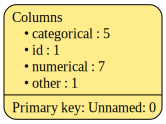

In [31]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(dfPackage)
metadata.visualize(
    show_table_details='summarized',
    output_filepath='./../data/metadata/telco_package.png'
)

### GaussianCopula <a class="anchor" id="gaussian_fit2"></a>

In [34]:
from sdv.single_table import GaussianCopulaSynthesizer

gcop2_synthesizer = GaussianCopulaSynthesizer(metadata)
gcop2_synthesizer.fit(dfPackage)
gcop2_synthesizer.save(
    filepath='./../models/gcop2_telco_package.pkl'
)

In [35]:
gaussianData2 = gcop2_synthesizer.sample(10000)
gaussianData2.to_csv('./../data/synthesized/telcopkg_gaussiandata.csv')
gaussianData2.head()

,Unnamed: 0,Company,Customer Number,Account Number,Subscription Number,Phone Number,Product Line,Product Family,Produit,Client,VOICE IN (Min),VOICE OUT (Min),Message,Data
0,0,VOYAGES EMILE WEBER SÀRL,28066634,27441597,6124322,+1-814-725-7916x142,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,77.776367,0.287479,2,16.987396
1,1,SLA S.A. C/O CAMIONNETTE,28065099,27441597,5697106,+1-995-619-4831x313,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,0.806744,0.889051,101,34.131344
2,2,SLA S.A C/O BUS,28066634,27441597,5673260,4023526871,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,0.016962,0.005051,0,928.034877
3,3,SALES-LENTZ AUTOCARS S.A – EXECUTIVE LANE,21476788,27441597,4760559,352-274-5905x29231,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,1129.284691,2823.096150,444,148.062532
4,4,SLA S.A. C/O CAMIONNETTE,21026219,27441597,4815810,888-871-5261x231,MOBILE,Enterprise,LUX_POST_TAN_ENTERPRISE,SL,461.709718,214.919515,129,0.227119


### CTGAN <a class="anchor" id="CTGAN_fit2"></a>

In [37]:
from sdv.single_table import CTGANSynthesizer

ctg2_synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=False,
    epochs=500,
    verbose=True)
ctg2_synthesizer.fit(dfPackage)
ctg2_synthesizer.save(
    filepath='./../models/ctg_telco_package.pkl'
)

Gen. (-0.11) | Discrim. (-0.42): 100%|██████████| 500/500 [01:48<00:00,  4.61it/s]


In [38]:
ctgData2 = ctg_synthesizer.sample(num_rows=10000)
ctgData2.to_csv('./../data/synthesized/telcopkg_ctgdata.csv')
ctgData2.describe()

,ipRange,ipHop,timeSubmitSec,inList,appHour,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13092.746095,0.888700,14.583634,1.230600,12.131656,0.292000
std,5614.025290,1.189813,7.597667,1.501149,5.519578,0.454705
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9306.724097,0.000000,4.683124,0.000000,9.881713,0.000000
50%,14350.146582,0.000000,17.978901,0.000000,10.950753,0.000000
75%,16133.525261,1.000000,20.048002,3.000000,13.540233,1.000000
max,39302.019227,5.000000,25.903553,6.000000,23.000000,1.000000


### CopulaGAN <a class="anchor" id="copula_fit2"></a>

In [39]:
from sdv.single_table import CopulaGANSynthesizer

cop2_synthesizer = CopulaGANSynthesizer(
    metadata,
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True)
cop2_synthesizer.fit(dfPackage)
cop2_synthesizer.save(
    filepath='./../models/cop_telco_package.pkl'
)

Gen. (0.26) | Discrim. (0.01):  10%|█         | 50/500 [00:12<01:56,  3.87it/s] 


KeyboardInterrupt: 

In [ ]:
ctgData2 = ctg_synthesizer.sample(num_rows=10000)
ctgData2.to_csv('./../data/synthesized/telcopkg_ctgdata.csv')
ctgData2.describe()

### TVAE  <a class="anchor" id="TVAE_fit2"></a>

In [ ]:
tvae2 = TVAE(primary_key='Unnamed: 0', field_transformers=field_transformer_en)
tvae2.fit(dfen)

In [ ]:
tData2 = tvae2.sample(10000)
tData2.head()

## Evaluation of synthetic data <a class="anchor" id="eval2"></a>

### Gaussian Copula  <a class="anchor" id="gaussian_eval2"></a>

In [ ]:
evaluate(gData2, dfen)

In [ ]:
evaluate(gData2, dfen, aggregate=False)

### CTGAN <a class="anchor" id="CTGAN_eval2"></a>

In [ ]:
evaluate(ctData2, dfen)

In [ ]:
evaluate(ctData2, dfen, aggregate=False)

### CopulaGAN <a class="anchor" id="copula_eval2"></a>

In [ ]:
evaluate(cData2, dfen)

In [ ]:
evaluate(cData2, dfen, aggregate=False)

### TVAE <a class="anchor" id="TVAE_eval2"></a>

In [ ]:
evaluate(tData2, dfen)

In [ ]:
evaluate(tData2, dfen, aggregate=False)

## Saving data

In [ ]:
G_json = gData2.to_json(orient="values")
file = open('data/generated/gaussian_enriched.json', 'w')
file.write(G_json)
file.close()

In [ ]:
ct_json = ctData2.to_json(orient="values")
file = open('data/generated/ctgan_enriched.json', 'w')
file.write(ct_json)
file.close()

In [ ]:
c_json = cData2.to_json(orient="values")
file = open('data/generated/copula_enriched.json', 'w')
file.write(c_json)
file.close()

In [ ]:
t_json = tData2.to_json(orient="values")
file = open('data/generated/tvae_enriched.json', 'w')
file.write(t_json)
file.close()